# 정규표현식

https://docs.python.org/ko/3/howto/regex.html

In [1]:
import re

## [1. 문자열의 분리 : re.split( ) ]  

### 'name: ykhong, age = 20; major/engineering'  

위와 같이 구분자가 일정하지 않은 경우 문자열을 분리하기 쉽지 않다.  
==> 정규표현식의 split() 사용

In [2]:
?re.split

In [8]:
line="name : ykhong,age=20;major/engineering"

In [9]:
line.split(':')

['name ', ' ykhong,age=20;major/engineering']

In [10]:
line

'name : ykhong,age=20;major/engineering'

## #1) : 분리  

문자열 첫 문장부호인 콜론으로 분리해보면 아래와 같이 name과 나머지로 분리된다.

In [11]:
re.split(":",line)

['name ', ' ykhong,age=20;major/engineering']

## #2) : 콜론과 쉼표(:,) 분리

In [12]:
re.split(":,",line)

['name : ykhong,age=20;major/engineering']

아무것도 분리되지 않는다.  


In [15]:
# 방안1
re.split("[:,]",line)

['name ', ' ykhong', 'age=20;major/engineering']

In [16]:
# 방안2
re.split(":|,",line)

['name ', ' ykhong', 'age=20;major/engineering']

## #3) line이 포함한 모든 기호 및 문장부호 사용 분리

In [17]:
re.split("[:,=;/]",line)

['name ', ' ykhong', 'age', '20', 'major', 'engineering']

## 생각해보기  

name 다음에 콜론이 2개 연속 붙어 있는 경우 어떤 패턴을 적용하는 것이 좋을까?  

line2="name ::ykhong, age=20;major/engineering"

In [18]:
line2="name ::ykhong, age=20;major/engineering"

동일 패턴 [:,=;/]을 적용하면 빈 문자열이 발생

In [19]:
re.split("[:,=;/]",line2)

['name ', '', 'ykhong', ' age', '20', 'major', 'engineering']

+를 이용해도 마찬가지  
대괄호 안에서 ::으로 인식되는 것이 아니라 +기호 역시 찾아야 하는 구분자일 뿐이다.

In [22]:
re.split("[:,=;/]",line2)

['name ', '', 'ykhong', ' age', '20', 'major', 'engineering']

<idea0>  
 대괄호 없이 :+적용

In [29]:
re.split(":+",line2)

['name ', 'ykhong, age=20;major/engineering']

대괄호를 사용하지 않고 |로 연결

In [30]:
re.split("::|,|=|;|/",line2)

['name ', 'ykhong', ' age', '20', 'major', 'engineering']

::를 ;로 대체 후 동일 패턴 적용

In [31]:
re.sub("::",":",line2)

'name :ykhong, age=20;major/engineering'

### \s 사용  

- whitespace 문자 1개와 매치

In [32]:
re.split("\s",line)

['name', ':', 'ykhong,age=20;major/engineering']

In [36]:
re.split("\s+","name : ykhong ,    age= 20 ; major / engineering")

['name', ':', 'ykhong', ',', 'age=', '20', ';', 'major', '/', 'engineering']

1칸의 whitespace를 구분자로 하여 분리시킨다. 따라서 whitespace를 없애는 효과가 있다. 

In [37]:
"name : ykhong, age = 20: major/engineering"

'name : ykhong, age = 20: major/engineering'

#### \s 역시 활용 가능할 것으로 판단되니 패턴에 추가해서 적용해보자

In [38]:
re.split("[:,=;/\s]",line)

['name', '', '', 'ykhong', 'age', '20', 'major', 'engineering']

#### \s만 적용했을 떄와 달리 오히려 빈 문자열이 대량 발생하며 오히려 처리하기 더 불편해졌다. 빈 문자열의 발생 이유는 무엇일까?

In [39]:
re.split(":",line)

['name ', ' ykhong,age=20;major/engineering']

아래와 같은 output에서 empty string은 어떻게 제거할까?

In [46]:
temp=re.split("[:,=;/\s]",line)

<<방안1>>

In [47]:
result=[word for word in temp if bool(word)is True]

In [48]:
result

['name', 'ykhong', 'age', '20', 'major', 'engineering']

<<방안2>>

In [50]:
list(filter(None,temp))

['name', 'ykhong', 'age', '20', 'major', 'engineering']

동일한 패턴을 반복해서 수행하는 경우 패턴을 계속적으로 만들어 적용하면 매우 불편  
[패턴 컴파일] : re.compile

In [51]:
pattern=re.compile("[:,=;/\s]")

In [53]:
re.split(pattern,line)

['name', '', '', 'ykhong', 'age', '20', 'major', 'engineering']

In [54]:
pattern.split(line)

['name', '', '', 'ykhong', 'age', '20', 'major', 'engineering']

# Quiz  

ex="name : ykhong,age = 20; major/engineering hobby none"  

위 데이터를 처리하고 name,age,major,hobby를 key로 가지는 dict로 변환하시오

In [66]:
ex="name : ykhong, age = 20; major/engineering hobby none"

In [67]:
temp=re.split("[:,=;/\s]",ex)

In [68]:
w=list(filter(None,temp))

In [69]:
w

['name', 'ykhong', 'age', '20', 'major', 'engineering', 'hobby', 'none']

In [97]:
wkey=w[::2]

In [98]:
wvalue=w[1::2]

In [99]:
wdic={key:value for key,value in zip(wkey,wvalue) }

In [100]:
wdic

{'name': 'ykhong', 'age': '20', 'major': 'engineering', 'hobby': 'none'}

## [2. 문자열 처음, 끝 간다 매칭]

In [103]:
ex.startswith('name')

True

In [104]:
ex.endswith(".txt")

False

### 매칭의 활용 : 특정 폴더 내 파일 검색 등

In [105]:
import os

In [107]:
filenames = os.listdir('examples')

In [108]:
filenames

['test.txt', 'test1.csv', 'words.txt']

In [109]:
files=[file for file in filenames if file.endswith('.txt')]

In [110]:
files

['test.txt', 'words.txt']

In [111]:
"examples"+"/"+files[0]

'examples/test.txt'

In [126]:
def read_files(loc,x):
    loc=loc+"/"+x
    with open(loc,'r') as f:
        content = f.readlines()
    f.close
    return content

In [128]:
content=[]
loc="examples"
for file in files:
    content.append(read_files(loc,file))

In [129]:
read_files("examples",files[0])

['1번째 줄입니다.\n',
 '2번째 줄입니다.\n',
 '3번째 줄입니다.\n',
 '4번째 줄입니다.\n',
 '5번째 줄입니다.\n',
 '6번째 줄입니다.\n',
 '7번째 줄입니다.\n',
 '8번째 줄입니다.\n',
 '9번째 줄입니다.\n',
 '10번째 줄입니다.\n']

In [130]:
content

[['1번째 줄입니다.\n',
  '2번째 줄입니다.\n',
  '3번째 줄입니다.\n',
  '4번째 줄입니다.\n',
  '5번째 줄입니다.\n',
  '6번째 줄입니다.\n',
  '7번째 줄입니다.\n',
  '8번째 줄입니다.\n',
  '9번째 줄입니다.\n',
  '10번째 줄입니다.\n'],
 ['Fortunately, however, for the reputation of Asteroid B-612, a Turkish dictator made a law that his subjects, under pain of death, should change to European costume. So in 1920 the astronomer gave his demonstration all over again, dressed with impressive style and elegance. And this time everybody accepted his report.']]

## [3. 텍스트 패턴 매칭]  

-re.match(pattern, string)  

간단한 매칭을 하려면 위와 같이 문자열 메소드로 충분하지만 패턴이 복잡해지면 마찬가지로 정규표현식을 활용한다

In [133]:
date="4/27/2021"

숫자를 의미하는 [0-9]를 적용하면 첫번째 숫자 4를 매칭한다.  
매칭한 value에 0번 index로 ([0]) 접근

In [134]:
re.match("[0-9]",date)

<re.Match object; span=(0, 1), match='4'>

In [142]:
re.match("[0-9]",date)[0]

'4'

#### 마찬가지로 \d의 패턴을 사용할 수 있다.

In [147]:
re.match("\d","153")

<re.Match object; span=(0, 1), match='1'>

In [153]:
re.match("\d+","153 55")

<re.Match object; span=(0, 3), match='153'>

이어서 월/일까지 매칭하고 밸류를 추출해보자

In [281]:
type(date)

str

In [155]:
re.match("\d/\d+/\d+",date)

<re.Match object; span=(0, 9), match='4/27/2021'>

In [156]:
re.match("\d/\d+/\d+",date)[0]

'4/27/2021'

### 활용  

text ='오늘은 4/2d7/2021. 어제는 4/26/2021'

In [282]:
text ='오늘은 4/2d7/2021. 어제는 4/26/2021'


In [283]:
re.match("\d+/\d+/\d+",text)

re.match를 이용할 경우 아무런 결과를 볼 수가 없다.  
re.match는 문자열 처음에서 매칭을 찾기 때문이다.  
프린트 문을 이용해보면 아무런 결과 없음을 알 수 있다.  

문자열 전체에서 해당 패턴을 찾고자 하면 re.findall()을 사용한다.

In [159]:
p=re.compile('\d+/\d+/\d+')

In [160]:
p.findall(text)

['4/27/2021', '4/26/2021']

In [161]:
p

re.compile(r'\d+/\d+/\d+', re.UNICODE)

In [165]:
re.findall('[가-힣]',text)

['오', '늘', '은', '어', '제', '는']

In [164]:
re.findall('[가-힣]+',text)

['오늘은', '어제는']

In [171]:
re.findall("[가-힣ㄷㅋ]+",(text+"ㅋㄷ"))

['오늘은', '어제는']

# Quiz  
위의 결과를 바탕으로 월, 일, 년을 모두 분리하고 2차원 리스트로 구성해보세요  

목표 : [["4","27","2021"],["4","26","2021"]]

In [175]:
text

'오늘은 4/27/2021. 어제는 4/26/2021'

In [177]:
a=re.findall("[0-9]+",text)
a

['4', '27', '2021', '4', '26', '2021']

In [180]:
date2=[a[0:3],a[3:]]

In [181]:
date2

[['4', '27', '2021'], ['4', '26', '2021']]

In [184]:
p.findall(text)

['4/27/2021', '4/26/2021']

In [182]:
[i.split("/") for i in p.findall(text)]

[['4', '27', '2021'], ['4', '26', '2021']]

# 주요 라이브러리  

### 1. 넘파이 numpy  

넘파이는 빠르고 효율적인 계산을 위해 만들어진 라이브러리이다.  
고성능의 다차원 배열 객체를 계산할 효율적인 도구를 제공한다.  
넘파이의 핵심은 ndarray객체이다. 동일한 자료형을 가지는 n차원의 배열을 기본으로 한다. 

In [185]:
import numpy as np

In [199]:
a=np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [200]:
a.ndim # axis(축)의 수 반환

2

In [201]:
a.shape # n*m

(2, 3)

In [202]:
a.size

6

In [203]:
a.dtype

dtype('int32')

In [204]:
b=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [205]:
b

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [206]:
b.ndim

3

In [207]:
b.shape

(2, 2, 3)

In [208]:
b.size

12

In [209]:
b.dtype

dtype('int32')

In [211]:
bb=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])

In [212]:
bb

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

In [214]:
print(bb.ndim)
print(bb.shape)
print(bb.size)
print(bb.dtype)

3
(3, 2, 3)
18
int32


In [215]:
# numpy 기본계산
a=np.array([1,2,3])
b=np.array([10,20,30])

In [216]:
a+b

array([11, 22, 33])

In [217]:
np.add(a,b)

array([11, 22, 33])

In [218]:

b-a

array([ 9, 18, 27])

In [222]:
np.subtract(b,a)

array([ 9, 18, 27])

In [223]:
a**2

array([1, 4, 9], dtype=int32)

In [224]:
a*b

array([10, 40, 90])

In [225]:
a/b

array([0.1, 0.1, 0.1])

In [226]:
b<15

array([ True, False, False])

# 축을 기준으로 한 연산  

해당 axis에 대해서만 다르고 나머지는 같은 위치에서 연산.

In [227]:
c=np.array([[1,2,3],[4,5,6]])

In [228]:
c

array([[1, 2, 3],
       [4, 5, 6]])

In [229]:
# 행방향 axis=0 각 행에 같은 위치끼리 연산
c.sum(axis=0)

array([5, 7, 9])

In [230]:
# 열방향 axis=1 각 열에 같은 위치끼리 연산
c.sum(axis=1)

array([ 6, 15])

In [232]:
d=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [233]:
d.sum(axis=0) # 각 바깥묶음에 같은 위치끼리 연산

array([[ 8, 10, 12],
       [14, 16, 18]])

In [234]:
d.sum(axis=1)

array([[ 5,  7,  9],
       [17, 19, 21]])

In [235]:
d.sum(axis=2)

array([[ 6, 15],
       [24, 33]])

### 1차원 배열 numpy index/slice

In [236]:
e=np.array([1,2,3,4,5,6,7])

In [237]:
e[0]

1

In [238]:
e[-1]

7

In [239]:
e[:3]

array([1, 2, 3])

### 다차원 배열은 축을 기준으로 함

In [242]:
# 2차원

f=np.array([[1,2,3],
           [4,5,6],
           [7,8,9]])

In [243]:
f[0,2]

3

In [244]:
f[1:,0]

array([4, 7])

In [248]:
f[:,1]

array([2, 5, 8])

In [250]:
d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [249]:
d[:,0,0]

array([1, 7])

In [252]:
f

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [254]:
f[:,1]

array([2, 5, 8])

In [251]:
# 2차원 형태 그대로 추출
f[:,np.newaxis,1]

array([[2],
       [5],
       [8]])

In [255]:
f[0:2,np.newaxis,0:2]

array([[[1, 2]],

       [[4, 5]]])

## ravel(),reshape(),T

In [257]:
g = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

In [258]:
g

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [259]:
# 1차원 쭉 펴는것 -> np.ravel()
g.ravel() # 1차원 배열로

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [268]:
# n*m 변경
g.reshape(2,3,2)

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

In [269]:
# 전치행렬 transpose
g.T

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [271]:
from sklearn import datasets

In [272]:
iris=datasets.load_iris()

In [274]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [277]:
X1=iris["data"][:,2]
X2=iris["data"][:,3]

In [278]:
import matplotlib.pyplot as plt

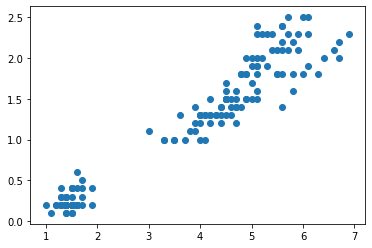

In [279]:
plt.scatter(X1,X2)